In [36]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

In [37]:
df = pd.read_csv('HeartDisease.csv')
df = df.dropna()
X = df.drop('num', axis=1)
y = df['num']
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,2
2,67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0,0


In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)


In [39]:
model = LogisticRegression(max_iter=10000, solver='saga')
model.fit(X_train_scaled, y_train)

y_pred_proba = model.predict_proba(X_test)

In [40]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred,average='weighted')
recall = recall_score(y_test, y_pred,average='weighted')
f1 = f1_score(y_test, y_pred,average='weighted')
roc_auc = roc_auc_score(y_test, y_pred_proba,multi_class='ovo')

print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")
print(f"ROC AUC Score: {roc_auc:.2f}")

Accuracy: 0.60
Precision: 0.52
Recall: 0.60
F1 Score: 0.55
ROC AUC Score: 0.53


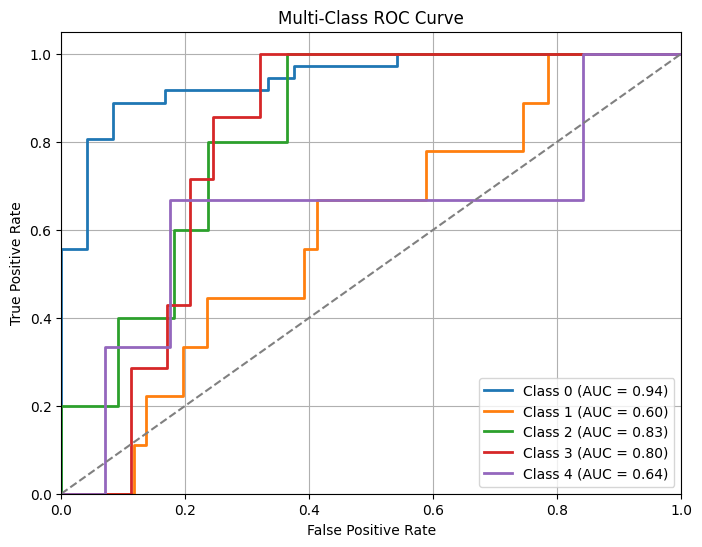

In [42]:
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc
import numpy as np
import matplotlib.pyplot as plt

classes = np.unique(y_test)
y_test_binarized = label_binarize(y_test, classes=classes)
y_pred_proba = model.predict_proba(X_test_scaled)

plt.figure(figsize=(8, 6))
for i in range(len(classes)):
    fpr, tpr, _ = roc_curve(y_test_binarized[:, i], y_pred_proba[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, lw=2, label=f'Class {classes[i]} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Multi-Class ROC Curve')
plt.legend(loc='lower right')
plt.grid()
plt.show()


# Logistic Regression

Logistic Regression digunakan untuk memprediksi **probabilitas** dari suatu sampel termasuk dalam kelas tertentu.  
Fungsi aktivasi yang digunakan adalah **Sigmoid Function**:

$$
P(Y=1|X) = \sigma(z) = \frac{1}{1 + e^{-z}}
$$

dengan

$$
z = b_0 + b_1 X_1 + b_2 X_2 + \dots + b_n X_n
$$

Di mana:
- $X_1, X_2, ..., X_n$ = Variabel independen (fitur)  
- $b_0$ = Intercept  
- $b_1, b_2, ..., b_n$ = Koefisien regresi  
- $\sigma(z)$ = Fungsi Sigmoid

# Matriks Evaluasi
## **Accuracy**
Accuracy mengukur seberapa sering model membuat prediksi yang benar dibandingkan dengan total data.

$$
Accuracy = \frac{TP + TN}{TP + TN + FP + FN}
$$

Di mana:  
- $TP$ = True Positive  
- $TN$ = True Negative  
- $FP$ = False Positive  
- $FN$ = False Negative  

Semakin tinggi **accuracy**, semakin baik performa model secara keseluruhan.

## **Precision**
Precision mengukur seberapa banyak prediksi positif yang benar dibandingkan dengan total prediksi positif.

$$
Precision = \frac{TP}{TP + FP}
$$

Precision tinggi berarti model jarang salah dalam memprediksi kelas positif. Berguna ketika **false positive** harus diminimalkan, misalnya dalam **deteksi kanker**.

## **Recall**
Recall mengukur seberapa banyak sampel positif yang benar-benar terdeteksi oleh model.

$$
Recall = \frac{TP}{TP + FN}
$$

Recall tinggi berarti model tidak melewatkan banyak sampel positif. Sangat penting dalam **deteksi penyakit atau penipuan**, di mana **false negative** harus diminimalkan.

##**F1 Score**
F1 Score adalah rata-rata harmonik antara Precision dan Recall. Berguna saat dataset tidak seimbang.

$$
F1\ Score = 2 \times \frac{Precision \times Recall}{Precision + Recall}
$$

F1 Score tinggi berarti keseimbangan yang baik antara Precision dan Recall.

## **ROC dan AUC**
ROC (**Receiver Operating Characteristic**) adalah kurva yang menunjukkan trade-off antara **True Positive Rate (TPR)** dan **False Positive Rate (FPR)**.

$$
TPR = \frac{TP}{TP + FN}
$$

$$
FPR = \frac{FP}{FP + TN}
$$

Jika nilai semakin mendekati 1, semakin bagus modelnya. Sedangkan jika nilai di bawah 0.5, model tersebut lebih buruk dari tebakan acak.